# import libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

import os
import numpy

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2.2.0-rc3


# define helper functions

In [0]:
def plot_graphs(history, metric):
  val = 'val_'+metric
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history[val], label=val)
  plt.xlabel('time')
  plt.ylabel(metric)
  plt.grid(True)
  
  # Place a legend to the right of this smaller subplot.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



# get dataset

In [4]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

--2020-05-02 13:30:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 2607:f8b0:4001:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   124MB/s    in 0.5s    

2020-05-02 13:30:19 (124 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
# unzip dataset

!unzip '/tmp/cats_and_dogs_filtered.zip' -d '/tmp'

Archive:  /tmp/cats_and_dogs_filtered.zip
   creating: /tmp/cats_and_dogs_filtered/
  inflating: /tmp/cats_and_dogs_filtered/vectorize.py  
   creating: /tmp/cats_and_dogs_filtered/validation/
   creating: /tmp/cats_and_dogs_filtered/train/
   creating: /tmp/cats_and_dogs_filtered/validation/dogs/
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: /tmp/cats_and_dogs_filtered/validation/d

# define trianing & validation directories

In [0]:
base_dir = os.path.join('/tmp/cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# split dataset into training & validation

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# view training file names

In [8]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# [:10] = 0 up to 10 (not including 10)
print('cats: \n{}'.format(train_cat_fnames[:10]))
print('dogs: \n{}'.format(train_dog_fnames[:10]))

cats: 
['cat.76.jpg', 'cat.634.jpg', 'cat.445.jpg', 'cat.67.jpg', 'cat.40.jpg', 'cat.777.jpg', 'cat.355.jpg', 'cat.308.jpg', 'cat.221.jpg', 'cat.703.jpg']
dogs: 
['dog.937.jpg', 'dog.805.jpg', 'dog.351.jpg', 'dog.319.jpg', 'dog.596.jpg', 'dog.102.jpg', 'dog.997.jpg', 'dog.742.jpg', 'dog.378.jpg', 'dog.345.jpg']


# get totals

In [9]:
print('total training cat imgs: \n{}'.format(len(os.listdir(train_cats_dir))))
print('total training dog imgs: \n{}'.format(len(os.listdir(train_dogs_dir))))
print('total validation cat imgs: \n{}'.format(len(os.listdir(validation_cats_dir))))
print('total validation dog imgs: \n{}'.format(len(os.listdir(validation_dogs_dir))))

total training cat imgs: 
1000
total training dog imgs: 
1000
total validation cat imgs: 
500
total validation dog imgs: 
500


# visualize imgs

In [0]:
# output imgs in 4x4 configuration for graph
num_rows, num_columns = 4,4

# index for interations
pic_index = 0

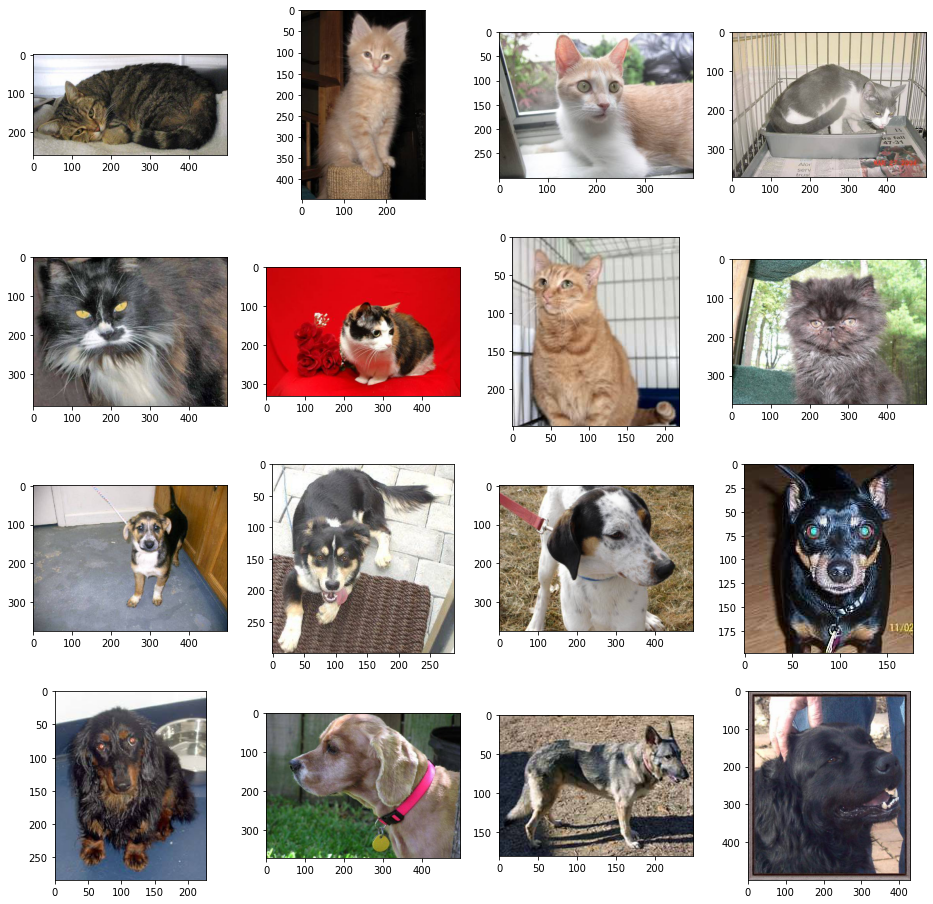

In [11]:
# display random imgs in batches of 8 with 2 of each data type

fig = plt.gcf() # get current figure
fig.set_size_inches(num_columns * 4, num_rows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # setup subplot
  sp = plt.subplot(num_rows, num_columns, i+1)
  # sp.axis('Off') # don't show axis/gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# preprocessing 

image augmentation is where you adjust the training set to potentially increase the number of diverse subjects it encompasses.
- image augmentation simply amends your images while training using transformations like rotation to simulate different subjects.

image augmentation potentially resolves overfitting by providing a greater span of different images to train on. 

---

**overfitting** 

when a dataset is small, we have few examples, potentially causing overfitting: 

`high classificaiton accuracy on a limited dataset, but significantly inferior classification accuracy on a general dataset`

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# instantiate ImageDataGenerator with params
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
    rotation_range=40, # randomly rotate (0-180 degrees)
    width_shift_range=0.2, # move img horizontally within frame
    height_shift_range=0.2, # move img vertically within frame
    shear_range=0.2, # transform img to cut out sections (0.2=20%)
    zoom_range=0.2, # magnify % of img
    horizontal_flip=True, # randomly make multiple imgs structurally similar
    fill_mode='nearest' # fill in lost pixels via transformation. 
)

validation_datagen = ImageDataGenerator(
    rescale=1./255, # normalize
    rotation_range=40, # randomly rotate (0-180 degrees)
    width_shift_range=0.2, # move img horizontally within frame
    height_shift_range=0.2, # move img vertically within frame
    shear_range=0.2, # transform img to cut out sections (0.2=20%)
    zoom_range=0.2, # magnify % of img
    horizontal_flip=True, # randomly make multiple imgs structurally similar
    fill_mode='nearest' # fill in lost pixels via transformation. 
)

# flow the training imgs to generator in batches of 20 using train_datagen
train_generator = train_datagen.flow_from_directory(
    train_dir, # source of training imgs
    target_size=(150,150), # resize all imgs to 150x150
    batch_size=20, 
    class_mode='binary'
)

# flow the validation imgs to generator in batches of 20 using validation_datagen
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # source of validation imgs
    target_size=(150, 150), # resize all imgs to 150x150
    batch_size=20,
    class_mode='binary'
)


Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# get pre-trained model

In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-02 13:30:26--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   156MB/s    in 0.5s    

2020-05-02 13:30:27 (156 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



# transfer learning 

transfer learning allows you to retrain the final layer of an existing model.

being able to retrain the final layer means that you can maintain the knowledge that the model had learned during its original training and apply it to your smaller dataset to achieve a specific task. 

`transfer learning results in highly accurate classifications without the need for extensive training time and computational power.`


In [0]:
from tensorflow.keras import layers # inspect layers

# InceptionV3 by Google was trained using a dataset of 1,000 classes
from tensorflow.keras.applications.inception_v3 import InceptionV3 

# pre-trained model weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# define pre-trained model 
pre_trained_model = InceptionV3(
    # img pixel dimensions = 150 height x 150 width x 3 color_channels
    input_shape=(150, 150, 3),
    include_top=False, # top layer is used for retraining for a specific task
    weights=None
)

# load pre-trained weights on to InceptionV3 model
pre_trained_model.load_weights(local_weights_file)

# pre-trained model freezing  

for transfer learning, freeze the weights (trainable=False) of an existing model and add specialized (trainable=True) top layer 

In [0]:
# loop through model layers and freeze
for layer in pre_trained_model.layers:
  layer.trainable = False

model.summary()

# inspect trainable top layer 

In [16]:
last_layer = pre_trained_model.get_layer('mixed7') # can get layer name from model summary
print('top layer output_shape: {}'.format(last_layer.output_shape))
last_output = last_layer.output


top layer output_shape: (None, 7, 7, 768)


# define model with specialized layers 

**transfer learning**

`add specialized layers that will be on top of the frozen layers of the pre-trained model`

---

**dropout layer**

`dropout layer is useful in preventing overfitting by deactivating a random number of neurons in a layer`

adding a dropout layer deters neighbor neurons from having similar weights, thus preserving final training
- a neuron taking in multiple inputs with varying weights cannot rely on any one feature, motivating it to spread out the weights. 

In [0]:
# formatting layer(x) is an alt method to building a model

x = tf.keras.layers.Flatten()(last_output) # flatten input_vector (InceptionV3 pre-trained model output)
x = tf.keras.layers.Dense(units=1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x) # randomly deactivate 20% of neurons in this layer

# output layer/ transfer learning top layer
x = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

# add specialized layers on top of pre_trained_model layers
model = tf.keras.Model(pre_trained_model.input, x)

# compile the model

build the model by compiling it with a loss, optimizer, and objective metric
- the optimizer uses the loss to adjust the weights to optimize prediction accuracy
- the loss=prediction accuracy
- metrics= target performance indicators

In [0]:
# since its a binary classifier, use binary crossentropy loss
# lr = learning rate/alpha
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), metrics=['accuracy'])

# define callbacks

In [0]:
# enable early_stopping to prevent overfitting
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > .99:
      print('\nenable early stopping, training accuracy > 98%')
      self.model.stop_training = True

# instantiate callbacks
callbacks = myCallback()

# train the model

fit the model to train & learn the optimal weights

In [20]:
# assign the train model to a history var for performance querying
history = model.fit(
    train_generator,
    steps_per_epoch=100, # 2000 imgs = batch_size(20) * steps(100)
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50, # 1000 imgs = batch_size(20) * steps(50)
    # callbacks=[callbacks],
    verbose=2
)

Epoch 1/100
100/100 - 29s - loss: 0.3527 - accuracy: 0.8635 - val_loss: 0.1846 - val_accuracy: 0.9320
Epoch 2/100
100/100 - 28s - loss: 0.2216 - accuracy: 0.9180 - val_loss: 0.1603 - val_accuracy: 0.9270
Epoch 3/100
100/100 - 28s - loss: 0.2101 - accuracy: 0.9250 - val_loss: 0.2365 - val_accuracy: 0.8950
Epoch 4/100
100/100 - 28s - loss: 0.1894 - accuracy: 0.9325 - val_loss: 0.2440 - val_accuracy: 0.9120
Epoch 5/100
100/100 - 28s - loss: 0.1822 - accuracy: 0.9315 - val_loss: 0.2393 - val_accuracy: 0.9210
Epoch 6/100
100/100 - 28s - loss: 0.1691 - accuracy: 0.9405 - val_loss: 0.1997 - val_accuracy: 0.9280
Epoch 7/100
100/100 - 28s - loss: 0.1713 - accuracy: 0.9360 - val_loss: 0.2731 - val_accuracy: 0.9100
Epoch 8/100
100/100 - 28s - loss: 0.1897 - accuracy: 0.9380 - val_loss: 0.2056 - val_accuracy: 0.9310
Epoch 9/100
100/100 - 28s - loss: 0.1536 - accuracy: 0.9475 - val_loss: 0.2950 - val_accuracy: 0.9030
Epoch 10/100
100/100 - 28s - loss: 0.1640 - accuracy: 0.9420 - val_loss: 0.2040 - 

KeyboardInterrupt: ignored

# visualize performance

In [0]:
plt.figure(figsize=(10,6))
plot_graphs(history, 'accuracy')
plt.show()

# clean up

terminate the kernel and free memory resources 


In [0]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)